# 1 데이터셋 출처
- pima Indians Diabetes Database |kaggle

## 1.1 데이터 구성
- Pregnancies : 임신 횟수
- Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
- BloodPressure : 이완기 혈압 (mm Hg)
- SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
- Insulin : 2시간 혈청 인슐린 (mu U / ml)
- BMI : 체질량 지수 (체중kg / 키(m)^2)
- DiabetesPedigreeFunction : 당뇨병 혈통 기능
- Age : 나이
- Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

# 2 필요한 라이브러리 로드

In [85]:
# 데이터분석을 위한 Pandas 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 
# 구버전 주피터 노트북은 디폴트 설정떄문에 해야함

# 3 데이터셋 로드

In [86]:
!move "C:\Users\BIT-R45\Downloads\새 폴더\diabetes.csv"

지정된 파일을 찾을 수 없습니다.


In [87]:
df=pd.read_csv('file-path/data/diabetes.csv',encoding='cp949')
df.shape

(768, 9)

In [88]:
df.head()
#전부 다 숫자로 되어있어서 따로 전처리가 필요 하지 않을듯.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- 다양한 옵션을 지정하여 모델의 성능을 개선해볼 수도 있지만 feature engineering을 해보겠습니다.
- 수치의 범위가 넓으면 수치형 변수의 조건이 너무 세분화되어 tree가 깊어집니다.
- 샘플의 수가 적으면 오퍼피팅(과적합)이 발생할 가능성이 높습니다.
- 오버피팅이란 모의고사에 너무 익숙해져서 실전시험에서 좋은 결과를 얻지 못하는 현상입니다.
- 그러므로 수치형 데이터를 범주화하여 성능을 높여보겠습니다.
- 이전에 만들었던 노트북을 make a copy하여 처음부터 실행합니다.
- 이전 모델에서 나온 점수를 높여보겠습니다.

 

# ○○수치형 변수를 범주형 변수로 만들기

In [89]:
df['Pregnancies_high']=df['Pregnancies']>6

In [90]:
#  One-Hot-Encoding
# 수치 >> 범주 >> 수치
# 성능이 오히려 떨어질 수도 있다.
df['Age_low'] = df['Age']<30
df['Age_middle']=(df['Age']>=30) & (df['Age']<=60)
df['Age_high'] = df["Age"]>60
df[['Age','Age_low','Age_middle','Age_high']]

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False
...,...,...,...,...
763,63,False,False,True
764,27,True,False,False
765,30,False,True,False
766,47,False,True,False


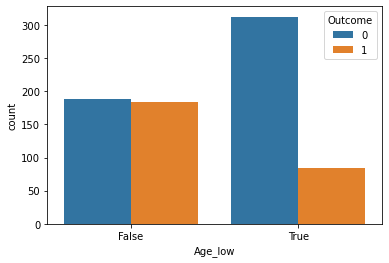

In [91]:
sns.countplot(data=df,x='Age_low',hue='Outcome')

# ○○결측치 다루기

In [92]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Pregnancies_high            0
Age_low                     0
Age_middle                  0
Age_high                    0
dtype: int64

In [93]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [94]:
df['Insulin_nan'] = df['Insulin'].replace(0,np.nan)
df[['Insulin','Insulin_nan']]

,Insulin,Insulin_nan
0,0,NaN
1,0,NaN
2,0,NaN
3,94,94.0
4,168,168.0
...,...,...
763,180,180.0
764,0,NaN
765,112,112.0
766,0,NaN


In [95]:
df['Insulin_nan'].isnull().sum()

374

In [96]:
# 인슐린 결측치 비율
df['Insulin_nan'].isnull().mean()

0.4869791666666667

In [97]:
df.groupby(['Outcome'])['Insulin','Insulin_nan'].agg(['mean','median'])

<ipython-input-97-bceb5b5b0c39>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Outcome'])['Insulin','Insulin_nan'].agg(['mean','median'])


Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000     39  130.287879  102.5
1        100.335821      0  206.846154  169.5

In [98]:
# 결측치를 채워주는 여러가지 방법
df.loc[(df['Outcome'] ==1) & (df['Insulin_nan'].isnull()),"Insulin_nan"] = 169.5
df.loc[(df['Outcome'] ==0) & (df['Insulin_nan'].isnull()),"Insulin_nan"] = 102.5


# ○○왜도, 첨도

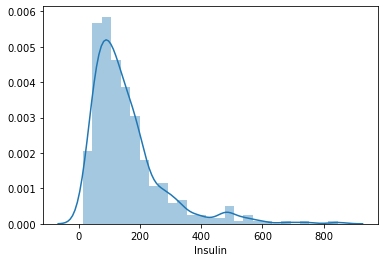

In [99]:
sns.distplot(df.loc[df['Insulin']>0,'Insulin'])

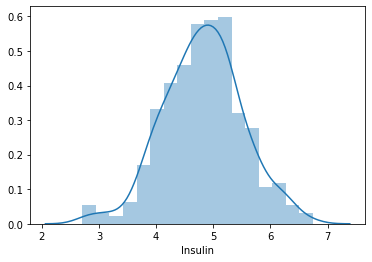

In [100]:
# 데이터가 치우쳐저 있을때 보다 정규분포를 이룰때 머신러닝이나 딥러닝 알고리즘은 더 놓은 성능을 낸다.
sns.distplot(np.log(df.loc[df['Insulin']>0,'Insulin']+1))

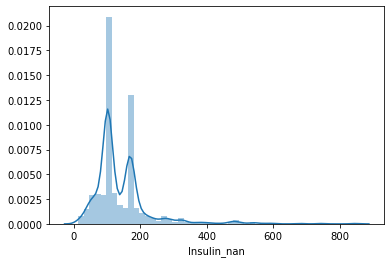

In [101]:
sns.distplot(df['Insulin_nan'])

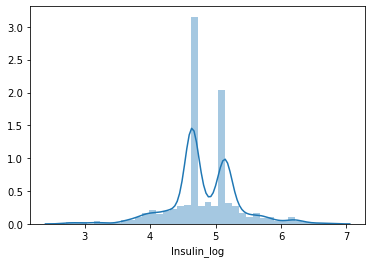

In [102]:
# 마이너스 무한대로 수렴하는 것을 방지하기위해서 +1
df['Insulin_log'] = np.log(df['Insulin_nan']+1)
sns.distplot(df['Insulin_log'])

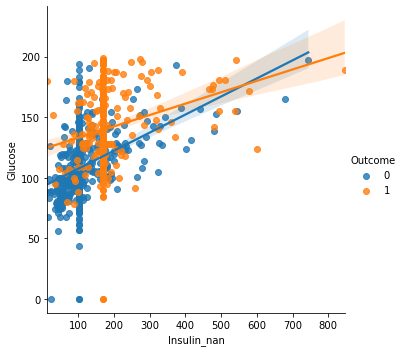

In [103]:
sns.lmplot(data=df, x='Insulin_nan', y='Glucose',hue='Outcome')

In [104]:
df['low_glu_insulin'] = (df['Glucose']<100) & (df['Insulin_nan']<=102.5)
df['low_glu_insulin']

0      False
1       True
2      False
3       True
4      False
       ...  
763    False
764    False
765    False
766    False
767     True
Name: low_glu_insulin, Length: 768, dtype: bool

In [105]:
pd.crosstab(df['Outcome'],df['low_glu_insulin'])

low_glu_insulin,False,True
Outcome,,
0,332,168
1,263,5


## 이상치(outlier) 다루기
- 제 3사분위수보다 1.5*사분위수범위를 초과하는 값과 제 1사분위수보다 1.5*사분위수범위 이상 미달하는 값은 이상치로 간주한다.
- 사분위수 범위는 3사분위수 - 1사분위수 이다.

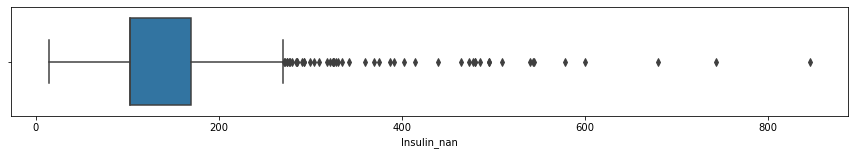

In [106]:
plt.figure(figsize=(15,2))
sns.boxplot(df['Insulin_nan'])

In [107]:
df['Insulin_nan'].describe()

count    768.000000
mean     141.753906
std       89.100847
min       14.000000
25%      102.500000
50%      102.500000
75%      169.500000
max      846.000000
Name: Insulin_nan, dtype: float64

In [108]:
iqr3 = df['Insulin_nan'].quantile(0.75)
iqr1 = df['Insulin_nan'].quantile(0.25)
iqr=iqr3-iqr1
iqr

67.0

In [109]:
out = iqr3+iqr*1.5
out

270.0

In [110]:
df[df['Insulin_nan']>out].shape

(51, 16)

In [111]:
df[df['Insulin_nan']>600].shape

(3, 16)

# 피쳐 스케일링

In [112]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[['DiabetesPedigreeFunction','Glucose']])
scale = scaler.transform(df[['DiabetesPedigreeFunction','Glucose']])
scale

array([[ 0.46849198,  0.84832379],
       [-0.36506078, -1.12339636],
       [ 0.60439732,  1.94372388],
       ...,
       [-0.68519336,  0.00330087],
       [-0.37110101,  0.1597866 ],
       [-0.47378505, -0.8730192 ]])

In [113]:
# df[['DiabetesPedigreeFunction','Glucose']] = scale
# df[['DiabetesPedigreeFunction','Glucose']].hist()

## CSV 파일로 저장하기

In [116]:
df.to_csv('file-path/data/diabetes_feature.csv',index=False)

In [117]:
pd.read_csv('file-path/data/diabetes_feature.csv')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,True,False,False,True,180.0,5.198497,False
764,2,122,70,27,0,36.8,0.340,27,0,False,True,False,False,102.5,4.639572,False
765,5,121,72,23,112,26.2,0.245,30,0,False,False,True,False,112.0,4.727388,False
766,1,126,60,0,0,30.1,0.349,47,1,False,False,True,False,169.5,5.138735,False


# 4 학습,예측 데이터셋 나누기

In [63]:
# 8:2 의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 
# split_count 라는 변수에 담습니다.

split_count=int(df.shape[0]*0.8)
split_count

614

In [64]:
# train, test로 슬라이싱을 통해 데이터를 나눕니다.

train = df[:split_count].copy()
test = df[split_count:].copy()
test.shape

(154, 16)

In [65]:
train[train['Insulin_nan']<600].shape

(610, 16)

In [66]:
train= train[train['Insulin_nan']<600]
train.shape

(610, 16)

# 5 학습,예측에 사용할 컬럼

In [67]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
feature_names=train.columns.tolist()
feature_names.remove('Pregnancies')
feature_names.remove('Outcome')
feature_names.remove('Age_low')
feature_names.remove('Age_middle')
feature_names.remove('Age_high')
feature_names.remove('Insulin')
feature_names.remove('Insulin_log')
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_nan',
 'low_glu_insulin']

# 6 정답값이자 예측해야 될 값

In [68]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.
label_name='Outcome'
label_name

'Outcome'

# 7 학습,예측 데이터셋 만들기

In [69]:
# 학습 세트 만들기 ex) 시험의 기출문제

x_train = train[feature_names]
print(x_train.shape)
x_train.head()

(610, 9)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
0,0.848324,72,35,33.6,0.468492,50,False,169.5,False
1,-1.123396,66,29,26.6,-0.365061,31,False,102.5,True
2,1.943724,64,0,23.3,0.604397,32,True,169.5,False
3,-0.998208,66,23,28.1,-0.920763,21,False,94.0,True
4,0.504055,40,35,43.1,5.484909,33,False,168.0,False


In [70]:
# 정답 값을 만들어 줍니다. ex) 기출문제의 정답
y_train=train[label_name]
print(y_train.shape)
y_train.head()

(610,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [71]:
# 예측에 사용할 데이터세트를 만듭니다. ex) 실전 시험문제

x_test = test[feature_names]
print(x_test.shape)
x_test.head()

(154, 9)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
614,0.535352,74,26,36.1,0.257084,50,True,144.0,False
615,-0.466156,72,0,25.8,-0.799958,27,False,102.5,False
616,-0.121888,96,0,28.7,-0.950964,30,False,102.5,False
617,-1.655448,62,13,20.1,-0.648952,23,False,15.0,True
618,-0.278373,82,24,28.2,2.446670,50,True,169.5,False


In [72]:
# 예측의 정답값 ex)실전 시험 문제의 정답
# 데이터세트와 정답값은 행의 크기가 일치해야한다.
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

# 8 머신러닝 알고리즘 가져오기

In [73]:
# 당뇨병 인지 아닌지 분류 하는거 이기 때문에 Classifier 사용
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

# 9 학습(훈련)
- 시험을 볼 때 기출문제(x_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [74]:
# model.fit?
# 결측치가 들어있으면 머신러닝 알고리즘이 학습을 할 수 없음.
model.fit(x_train,y_train)

DecisionTreeClassifier()

# 10 예측
- 실전 시험문제(x_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.

In [75]:
y_predict = model.predict(x_test)
y_predict[:5]

array([1, 0, 0, 0, 1], dtype=int64)

# 11 트리 알고리즘 분석하기
- 의사결정나무를 시각화 합니다.

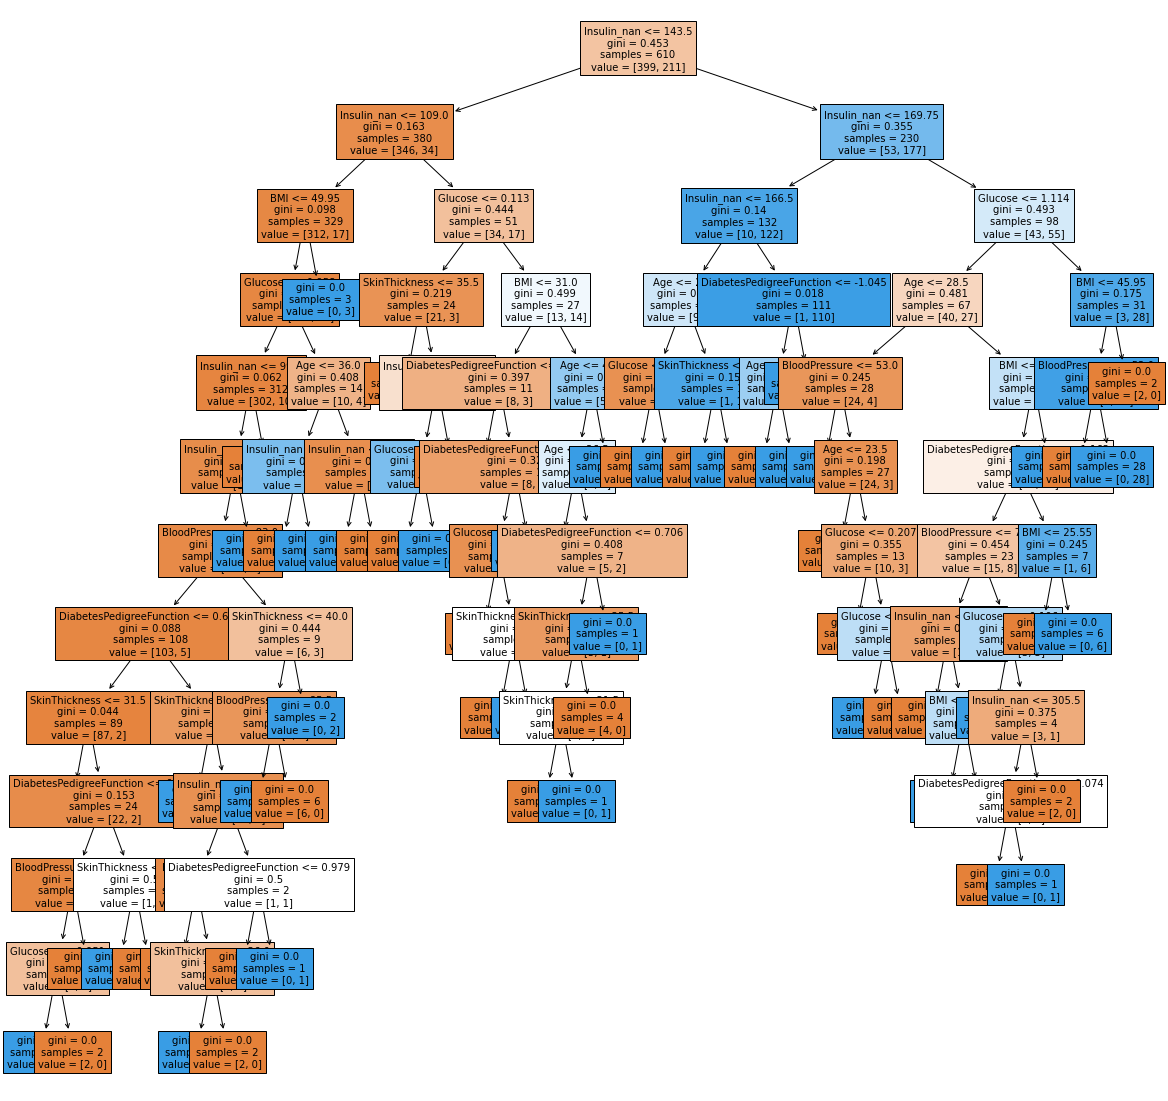

In [76]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree = plot_tree(model,
                 feature_names=feature_names,
                 filled=True,
                 fontsize=10)
# 글루코스가 가장 좋은 조건
# 지니계수가 0이되면 당뇨병이다 아니다 판단하게됨.
# 오버피팅(과적합)을 방지하기위해 트리의 깊이를 제한 하기도 함.

In [77]:
# 피처의 중요도를 추출하기
# 피처의 순서에 따라서 중요도 알려줌
model.feature_importances_

array([0.10332551, 0.03260019, 0.04594073, 0.0716271 , 0.03818837,
       0.07849848, 0.        , 0.62981961, 0.        ])

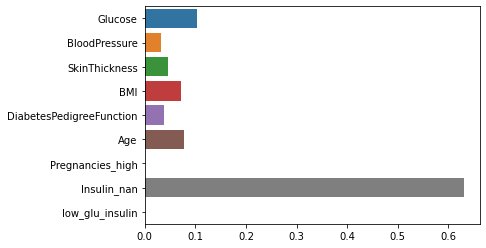

In [78]:
# 피처의 중요도 시각화하기
# 생각외로 인슐린 수치가 당뇨병에 큰 중요도가 있진 않았음.
sns.barplot(x=model.feature_importances_,y=feature_names)

# 12 정확도(Accuracy) 측정하기

In [79]:
# 실제갑 - 예측값을 빼주면 같은 값은 0으로 나오게 된다
# 여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 됩니다.
# abs(y_test - y_predict).sum()/len(y_test)
# 41 >> 37 >> 47(age(기준 25)범주화 했을떄 정확도가 오히려 떨어짐) >> 56(age 기준 30) 정확도 더 떨어짐
#  >> 26 (인슐린 결측치를 평균으로 대체했더니 오차가 확 줄어듬)
#  >> 18 (인슐린 결측치를 중앙값으로 대체했더니 오차가 더 줄어듬)
#  >> 18 (인슐린&글루코스 파생변수 추가)
diff_count = abs(y_test - y_predict).sum()
diff_count

20

In [80]:
# 예측 정확도를 구합니다. 100점 만점 중에 몇 점을 맞았는지 구한다고 보면 됩니다.

(len(y_test) - diff_count)/len(y_test) * 100

87.01298701298701

In [81]:
# 위에서 처럼 직접 구할 수도 있지만 미리 구현된 알고리즘을 가져와 사용합니다.

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predict) * 100

87.01298701298701

In [82]:
# model의 score로 점수를 계산합니다.
model.score(x_test,y_test) * 100

87.01298701298701

In [83]:
# 피쳐 엔지니어링 이나 모델 엔지니어링 통해서 모델의 성능을 높힐 수 있다.
# 모수가 적은 데이터를 가지고 일반화 했을때 예측력이 오히려 떨어 질 수도 있다.
# 과적합(오버피팅)이 일어날 수 있다.
# 연속된 수치데이터를 범주형 데이터로 만들거나 결측치를 조정해서 과적합을 줄일 수 있다.

In [50]:
# 모델을 학습하고, 예측하면 성능이 오히려 더 나빠졌습니다.
# 좋은 기법을 쓴다고 해서 더 나은 성능이 나오는 것은 아닙니다. 다양한 방법을 시도해봐야 합니다.
# 해당 컬럼에 해당되는 지의 여부를 적기 위해 one-hot-encoding을 사용했습니다.
# one-hot-encoding은 범주형 데이터를 수치형으로 할 때 많이 사용합니다. 

In [84]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,0.848324,72,35,0,33.6,0.468492,50,1,False,False,True,False,169.5,5.138735,False
1,1,-1.123396,66,29,0,26.6,-0.365061,31,0,False,False,True,False,102.5,4.639572,True
2,8,1.943724,64,0,0,23.3,0.604397,32,1,True,False,True,False,169.5,5.138735,False
3,1,-0.998208,66,23,94,28.1,-0.920763,21,0,False,True,False,False,94.0,4.553877,True
4,0,0.504055,40,35,168,43.1,5.484909,33,1,False,False,True,False,168.0,5.129899,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,-0.622642,76,48,180,32.9,-0.908682,63,0,True,False,False,True,180.0,5.198497,False
764,2,0.034598,70,27,0,36.8,-0.398282,27,0,False,True,False,False,102.5,4.639572,False
765,5,0.003301,72,23,112,26.2,-0.685193,30,0,False,False,True,False,112.0,4.727388,False
766,1,0.159787,60,0,0,30.1,-0.371101,47,1,False,False,True,False,169.5,5.138735,False
